<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/logistic-regression-numpy-26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

### Load the Data and Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [7]:
data = pd.read_csv("https://drive.google.com/uc?id=1lHVyj6hKEnbZukPPKWjnF0zwAul0-cGR")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

### Visualize the Data

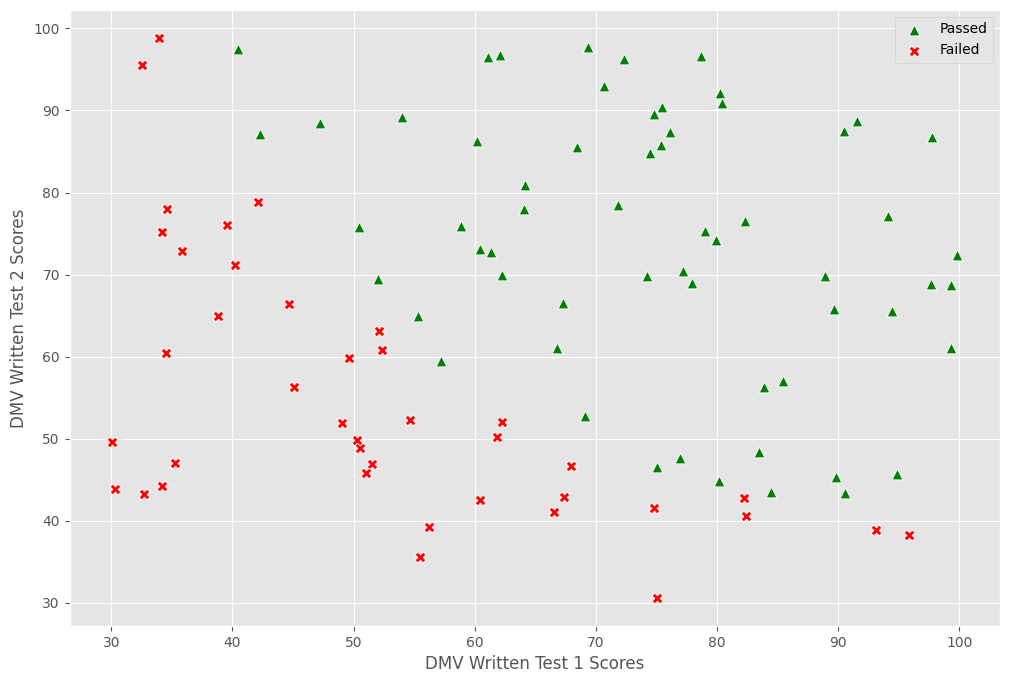

In [10]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])
plt.show();

### Define the Logistic Sigmoid Function $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [11]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

In [12]:
logistic_function(0)

np.float64(0.5)

### Compute the Cost Function $J(\theta)$ and Gradient

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [46]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

### Cost and Gradient at Initialization

In [69]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [70]:
import math
def gradient_descent(x, y, theta, alpha, iterations,epsilon):
    costs = []
    prev = math.inf
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        costs.append(cost)
        if(abs(costs[i]-prev) < epsilon):
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = costs[i]
        theta -= (alpha * gradient)
    return theta, costs

In [71]:
theta, costs = gradient_descent(X, y, theta_init, 0.001, 200000,1e-8)

In [72]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.50521273]
 [3.53992165]
 [3.28711503]]
Resulting cost: 0.20491965661205108


### Plotting the Convergence of $J(\theta)$

Plot $J(\theta)$ against the number of iterations of gradient descent:

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3802177551.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


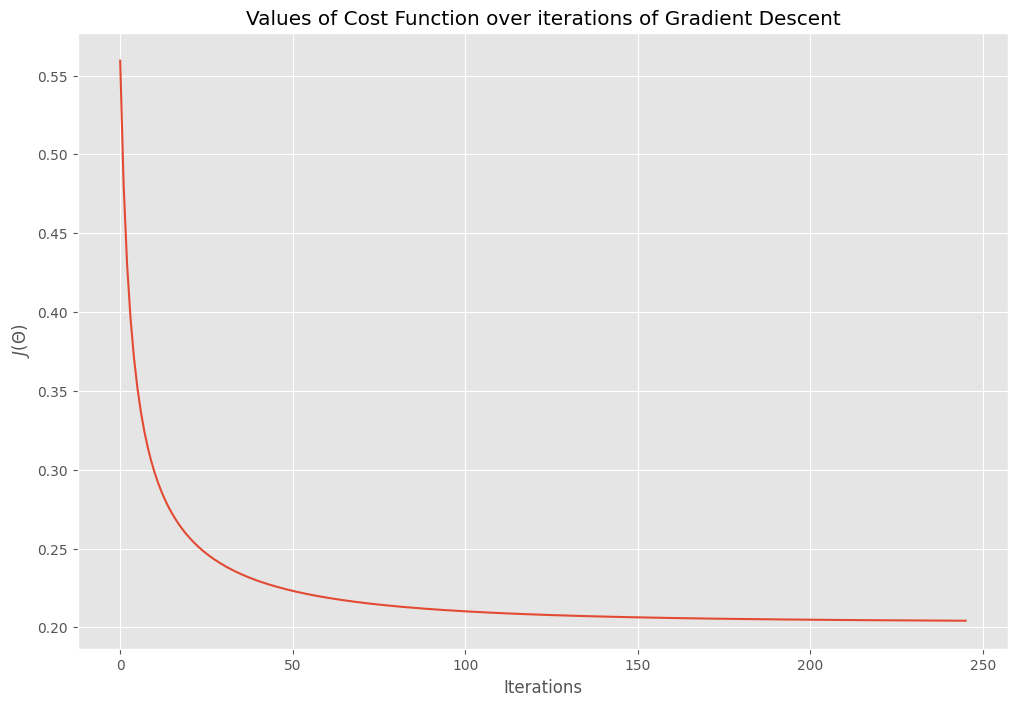

In [25]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Plotting the decision boundary

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

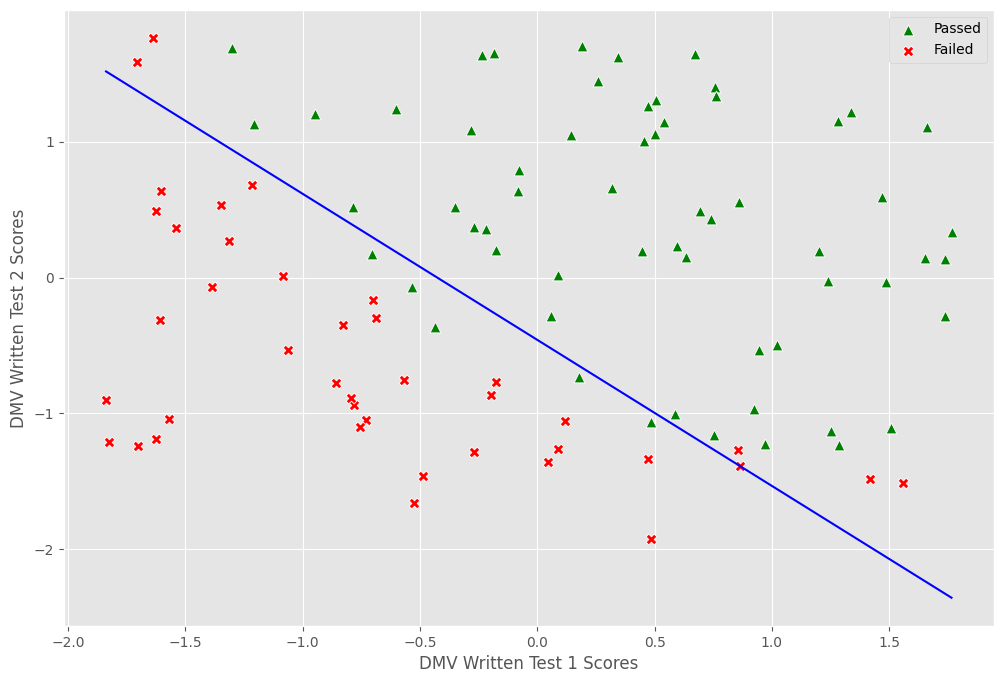

In [26]:
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["Passed", "Failed"])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

### Predictions using the optimized $\theta$ values

$h_\theta(x) = x\theta$

In [27]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [28]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 89 %


In [29]:
test = np.array([50,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.72 probability of passing.


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


XX = X[:,1:3]      # independent variabl
print(XX[0:3,])
# instantiate a logistic regression model, and fit with X and y


[[-1.60224763  0.63834112]
 [-1.82625564 -1.2075414 ]
 [-1.53903969  0.3612943 ]]


In [41]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(C=10)
model = model.fit(XX, y)

# check the accuracy on the training set
model.score(XX, y)

print("coef",model.coef_)
print("intercept",model.intercept_)

# predict_proba will return array containing proability of y = 0 and y = 1
print( model.predict_proba(XX)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0
print (model.predict(XX))




coef [[3.53002969 3.28018655]]
intercept [1.52202691]
[1.15058907e-01 1.38338202e-04 6.14728485e-02 9.83531362e-01
 9.96247277e-01 1.82677718e-02 9.97690092e-01 4.36133917e-01
 9.99245700e-01 7.15576908e-01 8.87427496e-01 4.35774477e-02
 9.98308312e-01 9.99585523e-01 1.82925973e-01 9.69863201e-01
 4.39042387e-01 1.78685377e-01 9.99234711e-01 5.69720962e-01
 9.01869825e-02 9.97067285e-01 1.32063740e-02 2.99180993e-04
 9.85921613e-01 8.27661650e-01 5.93296161e-01 8.41030772e-01
 1.18590256e-01 2.67884945e-02 8.71330534e-01 9.70633245e-01
 1.83171607e-01 4.04241422e-01 9.68184896e-02 4.87808678e-02
 8.21831127e-01 9.79364764e-01 2.34442026e-01 6.81962077e-02
 9.56570834e-01 1.11643521e-02 9.98716780e-01 5.07279540e-01
 8.50696166e-03 1.66021446e-01 9.87620306e-01 9.99983591e-01
 9.98148864e-01 9.99964118e-01 9.96082009e-01 9.98803155e-01
 8.82055309e-01 5.56574699e-03 1.49096935e-02 7.28664630e-02
 9.99600583e-01 6.69187708e-01 9.76569087e-01 9.91947729e-01
 9.98849203e-01 5.99003970e-04 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
